<a href="https://colab.research.google.com/github/st064560/my_python/blob/master/Lab_1_Galiutina_AN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Определим статистику посещаемости группы (просмотры, посещения в год)


*  Для начала откроем файл и посмотрим его содержимое, пропустим первую строку





In [0]:
import csv

with open('Lab_1_data.stat', 'r') as file:
    stat = csv.reader(file)
    for line in stat:
      if line[0] == "Дата":
        continue
      else:
        print(line)
        break

['15.03.2020', 'views', '', '', '1']


 

*  Создадим словарь views_stat и запишем туда следующие значение: [дата] - [просмотры]




In [0]:
import csv
from pprint import pprint # красивая печать словарей

views_stat = dict()
lst = []

with open('Lab_1_data.stat', 'r') as file:
    stat = csv.reader(file)
    for line in stat:
      if line[0] == "Дата":
        continue
      else:
        views_stat[line[0]] = int(line[4])
output_items = {k: views_stat[k] for k in list(views_stat.keys())[:5]}
print(output_items)


{'15.03.2020': 1, '14.03.2020': 1, '13.03.2020': 4, '12.03.2020': 1, '11.03.2020': 1}


 

*   В словраре views определим 5 ключей (2016, 2017 итд), в дальнейшем таким образом разделим данные по годам.
*   C помощью метода split разделим дату и оставим только год.Получим словаь views = [год] - [показатель].





In [138]:
import csv
import collections
views = dict()

with open ("Lab_1_data.stat", 'r') as file:
 data = csv.reader(file)
 views["2016"] = 0
 views["2017"] = 0
 views["2018"] = 0
 views["2019"] = 0
 views["2020"] = 0
 
 for line in data:
      if line[0]=="Дата":
       continue
      else:
       if line[1] == "views":
        #t = str(line[0])
         views[str(line[0].split('.')[2])] = views[str(line[0].split('.')[2])] + int(line[4])
views


{'2016': 841, '2017': 1132, '2018': 733, '2019': 1896, '2020': 309}



*   Проделаем тоже самое с показателем visitors.
*   Получим словаь visitors = [год] - [показатель].




In [141]:
import csv
import collections
visitors = dict()

with open ("Lab_1_data.stat", 'r') as file:
 data = csv.reader(file)
 visitors["2016"] = 0
 visitors["2017"] = 0
 visitors["2018"] = 0
 visitors["2019"] = 0
 visitors["2020"] = 0
 
 for line in data:
      if line[0]=="Дата":
       continue
      else:
       if line[1] == "visitors":
        
         visitors[str(line[0].split('.')[2])] = visitors[str(line[0].split('.')[2])] + int(line[4])
visitors



{'2016': 610, '2017': 823, '2018': 535, '2019': 1057, '2020': 204}




* Построим линейный график для показателя views.




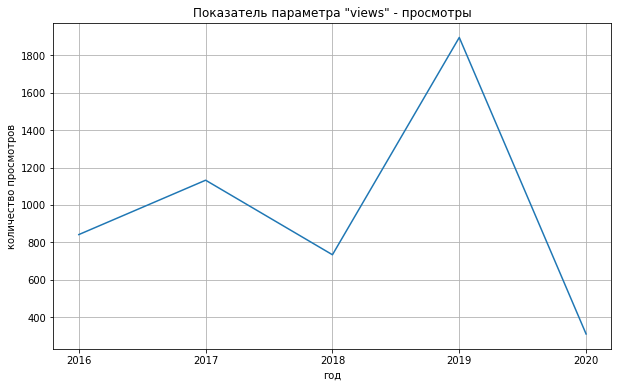

In [0]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

x_coords = list(views.keys())
y_coords = list(views.values())

fig, ax = plt.subplots()
fig.set_figwidth(10)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

# Построить график.
plt.plot(x_coords, y_coords)

# Добавить заголовок.
plt.title('Показатель параметра "views" - просмотры')

# Добавить на оси описательные метки.
plt.xlabel('год')
plt.ylabel('количество просмотров')
# Добавить сетку.
plt.grid(True)


# Показать график.
plt.show()




* Объединим показатели 'views' и 'visitors' на линейном графике.



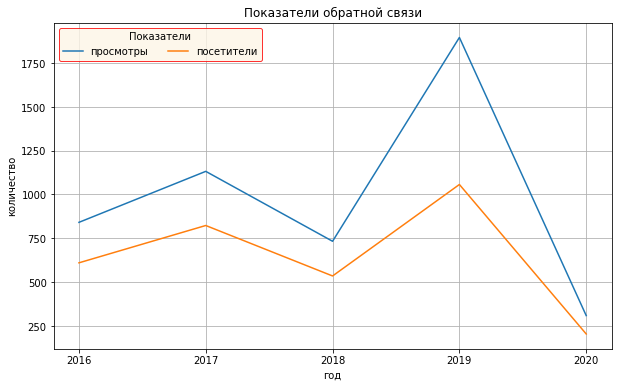

In [0]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

x_coords = list(views.keys())
x1_coords = list(visitors.keys())

y_coords = list(views.values())
y1_coords = list(visitors.values())

fig, ax = plt.subplots()
fig.set_figwidth(10)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

# Построить график.
plt.plot(x_coords, y_coords, label = 'просмотры')
plt.plot(x1_coords, y1_coords, label = 'посетители')

plt.legend(fontsize = 10,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          title = 'Показатели',    #  заголовок
          title_fontsize = '10'    #  размер шрифта заголовка
         )


# Добавить заголовок.
plt.title('Показатели обратной связи')

# Добавить на оси описательные метки.
plt.xlabel('год')
plt.ylabel('количество')

# Добавить сетку.
plt.grid(True)

# Показать график.
plt.show()

**Вывод**:
Мы не можем основывать свой анализ на данных 2019 года, тк политика сбора данных Вконтакте была изменена. Данные за 2020 год также нельзя считать показательными, так как данные представлены только за первый квартал. Таким образом, на основании данных 2016, 2017, 2018 годов показатели посещаемости группы (просмотры, посещения в год) на уровне 500 - 1200 пользователей в год.*

## 2. Проведём анализ охвата аудитории (reach/reach_viral/reach_subscribers)

 

*   Создадим словарь reach = [дата] - [полный охват].




In [2]:
import csv
import collections
reach = dict()

with open ("Lab_1_data.stat", 'r') as file:
 data = csv.reader(file)
 reach["2016"] = 0
 reach["2017"] = 0
 reach["2018"] = 0
 reach["2019"] = 0
 reach["2020"] = 0

 
 for line in data:
      if line[0]=="Дата":
       continue
      else:
       if line[1] == "reach":
        
         reach[str(line[0].split('.')[2])] = reach[str(line[0].split('.')[2])] + int(line[4])
reach



{'2016': 555, '2017': 733, '2018': 475, '2019': 4000, '2020': 491}



*  Создадим словарь reach_viral = [дата] - [виральный охват].






In [3]:
import csv
import collections
reach_viral = dict()

with open ("Lab_1_data.stat", 'r') as file:
 data = csv.reader(file)
 reach_viral["2016"] = 0
 reach_viral["2017"] = 0
 reach_viral["2018"] = 0
 reach_viral["2019"] = 0
 reach_viral["2020"] = 0

 
 for line in data:
      if line[0]=="Дата":
       continue
      else:
       if line[1] == "reach_viral":
        
         reach_viral[str(line[0].split('.')[2])] = reach_viral[str(line[0].split('.')[2])] + int(line[4])
reach_viral

{'2016': 410, '2017': 548, '2018': 385, '2019': 1379, '2020': 170}



* Создадим словарь reach_subscribers = [дата] - [охват подписчиков].






In [4]:
import csv
import collections
reach_subscribers = dict()

with open ("Lab_1_data.stat", 'r') as file:
 data = csv.reader(file)
 reach_subscribers["2016"] = 0
 reach_subscribers["2017"] = 0
 reach_subscribers["2018"] = 0
 reach_subscribers["2019"] = 0
 reach_subscribers["2020"] = 0

 
 for line in data:
      if line[0]=="Дата":
       continue
      else:
       if line[1] == "reach_subscribers":
        
         reach_subscribers[str(line[0].split('.')[2])] = reach_subscribers[str(line[0].split('.')[2])] + int(line[4])
reach_subscribers

{'2016': 145, '2017': 185, '2018': 90, '2019': 2621, '2020': 321}



* Отобразим полученные из словарей reach, reach_viral, reach_subscribers данные на графике.





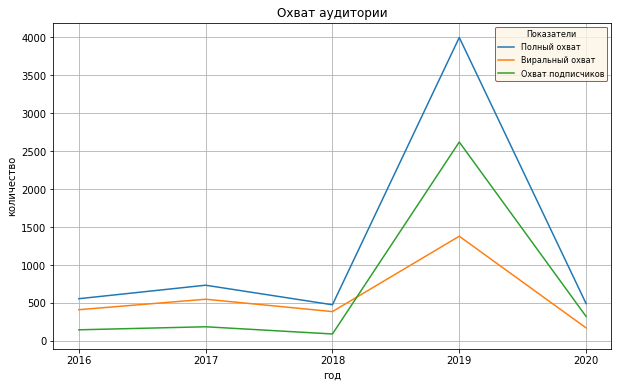

In [5]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

x_coords = list(reach.keys())
x1_coords = list(reach_viral.keys())
x2_coords = list(reach_subscribers.keys())

y_coords = list(reach.values())
y1_coords = list(reach_viral.values())
y2_coords = list(reach_subscribers.values())

fig, ax = plt.subplots()
fig.set_figwidth(10)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


# Построить график.
plt.plot(x_coords, y_coords, label = 'Полный охват')
plt.plot(x1_coords, y1_coords, label = 'Виральный охват')
plt.plot(x2_coords, y2_coords, label = 'Охват подписчиков')

plt.legend(fontsize = 8,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          title = 'Показатели',    #  заголовок
          title_fontsize = '8'    #  размер шрифта заголовка
         )


# Добавить заголовок.
plt.title('Охват аудитории')

# Добавить на оси описательные метки.
plt.xlabel('год')
plt.ylabel('количество')

# Добавить сетку.
plt.grid(True)

# Показать график.
plt.show()

**Вывод:** показатели вирального охвата преимущественно выше показателей органического. Это означает, что участники группы согласны распространять контент группы среди своих друзей. Естественное тиражирование постов увеличивает показатели охвата и позволяет привлечь в группу новых подписчиков.

##3. Проведём анализ демографии (пол - gender, возраст аудитории - age, gender_age, страна - countries)



* Создадим словарь gender = [год] - [кортеж = пол, значение]

* Используем кортеж в качестве значений словаря, чтобы поместить туда сразу несколько значений.




In [117]:
import csv

gender = dict()

with open('Lab_1_data.stat', 'r') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[0] == "Дата":
          continue
        else:
          if line[1] == 'gender':
            if line[0].split('.')[2] in gender:
              age = gender.get(line[0].split('.')[2])
              if line[2] in age:
                count = int(age.get(line[2]))
                count+= int(line[4])
                age[line[2]] = count
              else:
                age[line[2]] = int(line[4])
            else:
              gender[line[0].split('.')[2]] = {line[2]: line[4]}

print(gender)

{'2020': {'М': 117, 'Ж': 42}, '2019': {'Ж': 311, 'М': 620}, '2018': {'М': 303, 'Ж': 181}, '2017': {'М': 465, 'Ж': 264}, '2016': {'М': 383, 'Ж': 167}}




*  Отсортируем полученный словарь gender так, чтобы по порядку шли годы и показатели 'M', 'Ж'.





In [118]:
import csv

gender = dict()

with open('Lab_1_data.stat', 'r') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[0] == "Дата":
          continue
        else:
          if line[1] == 'gender':
            if line[0].split('.')[2] in gender:
              age = gender.get(line[0].split('.')[2])
              if line[2] in age:
                count = int(age.get(line[2]))
                count+= int(line[4])
                age[line[2]] = count
              else:
                age[line[2]] = int(line[4])
            else:
              gender[line[0].split('.')[2]] = {line[2]: line[4]}

#print(sorted(gender.items()))
for key in sorted(gender.keys()):
  gender[key] = sorted(gender[key].items())

print(gender)

#print(type(gender['2020'][0]))

{'2020': [('Ж', 42), ('М', 117)], '2019': [('Ж', 311), ('М', 620)], '2018': [('Ж', 181), ('М', 303)], '2017': [('Ж', 264), ('М', 465)], '2016': [('Ж', 167), ('М', 383)]}




*  Используя созданный словарь gender, построим столбчатую диаграмму охвата аудитории по полу.

*   Функция draw_gender позволяет ввести нужный нам год для построение графика, например "2017".









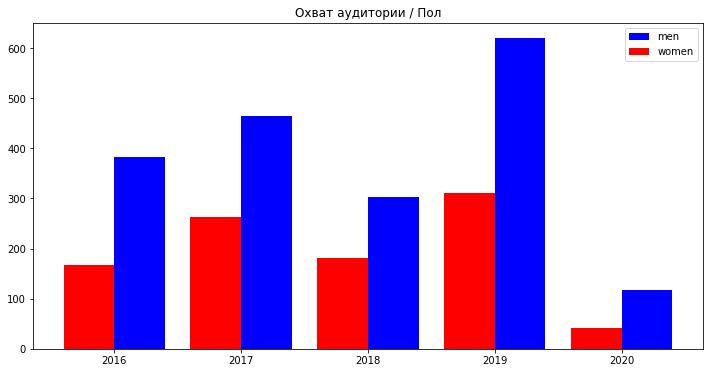

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
def draw_gender():
    # Создать список с координатами X левого края каждого столбика
    men = list()
    women = list()
    years = list()
    for key in sorted(gender.keys()):
      years.append(key)
      men.append(gender[key][1][1])
      women.append(gender[key][0][1])
    # Создать переменную для ширины столбика.
    bar_width = 0.5

    ind = np.array(len(men))
    fig, ax = plt.subplots()
    plt.title('Охват аудитории / Пол')
    
    ## массив, который содержит номера отрезков - тиков
    xs = range(len(men))
    ##  первый элемент plt.bar проставляет индексы иксов
    ## (на каких местах будут стоять значения - столбец)
    plt.bar([x + 0.2 for x in xs], men,
          width = 0.4, color = 'blue', label='men')
    plt.bar([x - 0.2 for x in xs], women,
          width = 0.4, color = 'red', label='women')
    
    

    fig.set_figwidth(12)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure
    ## расположение подписей на оси икс
    plt.xticks(xs, years)
    plt.legend()
    plt.show()
draw_gender()

**Вывод:** посетителями группы преимущественно являются лица мужского пола. Показатель превышает идентичный показатель женского пола в 1,5 – 2 раза по всем годам.


Далее проанализируем возрастной показатель
* Создадим словарь age_1 = [год] - [кортеж = возраст, значение]
* Используем кортеж в качестве значений словаря, чтобы поместить туда сразу несколько значений.


* Отсортируем полученнй словарь с помощью функции sorted.
* Теперь годы и возраста в словаре идут по порядку








In [94]:
import csv

age_1 = dict()

with open('Lab_1_data.stat', 'r') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[0] == "Дата":
          continue
        else:
          if line[1] == 'age':
            if line[0].split('.')[2] in age_1:
              years_1 = age_1.get(line[0].split('.')[2])
              if line[2] in years_1:
                count = int(years_1.get(line[2]))
                count+= int(line[4])
                years_1[line[2]] = count
              else:
                years_1[line[2]] = int(line[4])
            else:
              age_1[line[0].split('.')[2]] = {line[2]: line[4]}

#print(sorted(age_1.items()))
for key in sorted(age_1.keys()):
  age_1[key] = sorted(age_1[key].items())

print(age_1)

#print(type(age_1['2020'][0]))

{'2020': [('1-18', 1), ('18-21', 37), ('21-24', 24), ('24-27', 17), ('27-30', 22), ('30-35', 30), ('35-45', 13), ('45+', 3)], '2019': [('1-18', 8), ('18-21', 345), ('21-24', 140), ('24-27', 79), ('27-30', 58), ('30-35', 149), ('35-45', 38), ('45+', 38)], '2018': [('1-18', 15), ('18-21', 110), ('21-24', 110), ('24-27', 65), ('27-30', 24), ('30-35', 32), ('35-45', 29), ('45+', 57)], '2017': [('1-18', 30), ('18-21', 188), ('21-24', 143), ('24-27', 80), ('27-30', 39), ('30-35', 55), ('35-45', 38), ('45+', 69)], '2016': [('1-18', 28), ('18-21', 172), ('21-24', 129), ('24-27', 36), ('27-30', 17), ('30-35', 33), ('35-45', 23), ('45+', 31)]}




* Используя созданный словарь age_1, построим столбчатую диаграмму охвата аудитории по возрасту.
* Функция draw_age позволяет ввести нужный нам год для построение графика, например "2019".





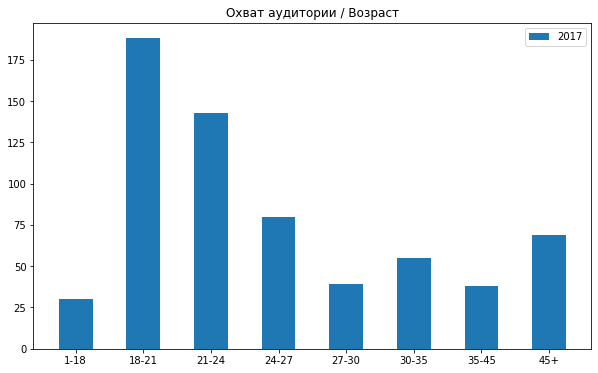

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
def draw_age(year):
    # Создать список с координатами X левого края каждого столбика
    left_edges = list()
    for i in range(len(age_1[year])):
      left_edges.append(age_1[year][i][0])
      


    heights = list()
    for i in range(len(age_1[year])):
      heights.append(age_1[year][i][1])# Создать список с высотами каждого столбика.


    # Создать переменную для ширины столбика.
    bar_width = 0.5


    fig, ax = plt.subplots()
    fig.set_figwidth(10)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure

    plt.title('Охват аудитории / Возраст')



    # Построить столбчатую диаграмму.
    plt.bar(left_edges, heights, bar_width, label = year)
    plt.legend()

    # Показать столбчатую диаграмму.

    plt.show()
draw_age('2017')

**Вывод:** Лидирующие позиции по 2017, 2018, 2019 году занимают следующие возрастная группы: 18 -21 и 21 – 24. Это выпускники школ и студенты. Напротив, наименьшее количество посещений показывают возрастные группы: 1 – 18, 27 – 30 и 30 – 35 (кроме 2019 года).


Далеее проанализируем показатель пол - возраст.
*   Строка 'gender_age' содержит сразу 3 критерия: пол, возраст, числовой показатель.
*   Разбиваем данные на категории - словари.



In [97]:
import csv

gender_age = dict()


with open('Lab_1_data.stat', 'r') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[0] == "Дата":
          continue
        else:
          if line[1] == 'gender_age':
            if line[0].split('.')[2] in gender_age:
              gender = gender_age.get(line[0].split('.')[2])
              if line[2] in gender:
                age = gender.get(line[2])
                if line[3] in age:
                  count = int(age.get(line[3]))
                  count+= int(line[4])
                  age[line[3]] = count
                else:
                  age[line[3]] = int(line[4])
              else:
                gender[line[2]] = {line[3]:line[4]}
            else:
              gender_age[line[0].split('.')[2]] = {line[2]: {line[3]:line[4]}}


print(gender_age)


{'2020': {'М': {'30-35': 27, '27-30': 16, '35-45': 12, '1-18': 1, '18-21': 29, '21-24': 14, '24-27': 8, '45+': 2}, 'Ж': {'24-27': 9, '27-30': 6, '21-24': 10, '35-45': 1, '18-21': 8, '30-35': 3, '45+': 1}}, '2019': {'М': {'30-35': 136, '18-21': 249, '21-24': 70, '27-30': 34, '24-27': 37, '35-45': 25, '45+': 13, '1-18': 4}, 'Ж': {'18-21': 96, '24-27': 42, '21-24': 70, '27-30': 24, '35-45': 13, '1-18': 4, '30-35': 13, '45+': 25}}, '2018': {'М': {'45+': 37, '18-21': 70, '24-27': 45, '21-24': 69, '30-35': 18, '35-45': 22, '1-18': 9, '27-30': 14}, 'Ж': {'30-35': 14, '18-21': 40, '21-24': 41, '24-27': 20, '35-45': 7, '1-18': 6, '27-30': 10, '45+': 20}}, '2017': {'М': {'24-27': 46, '21-24': 111, '30-35': 24, '45+': 49, '18-21': 131, '35-45': 23, '1-18': 14, '27-30': 20}, 'Ж': {'27-30': 19, '30-35': 31, '45+': 20, '18-21': 57, '1-18': 16, '24-27': 34, '35-45': 15, '21-24': 32}}, '2016': {'М': {'1-18': 19, '21-24': 104, '35-45': 20, '30-35': 25, '45+': 18, '18-21': 120, '24-27': 24, '27-30': 10}



*   Проведём сортировку полученного словаря gender_age. Ключ словаря - год, значение - кортеж (пол, возраст)




In [98]:
import csv

gender_age = dict()


with open('Lab_1_data.stat', 'r') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[0] == "Дата":
          continue
        else:
          if line[1] == 'gender_age':
            if line[0].split('.')[2] in gender_age:
              gender = gender_age.get(line[0].split('.')[2])
              if line[2] in gender:
                age = gender.get(line[2])
                if line[3] in age:
                  count = int(age.get(line[3]))
                  count+= int(line[4])
                  age[line[3]] = count
                else:
                  age[line[3]] = int(line[4])
              else:
                gender[line[2]] = {line[3]:line[4]}
            else:
              gender_age[line[0].split('.')[2]] = {line[2]: {line[3]:line[4]}}



# проходимся по ключам gender age получаем словарь с полом
for key in sorted(gender_age.keys()):
  # проходимся по ключам словаря с полами и получаем словарь с возр группами
  for gender in sorted(gender_age[key].keys()):
    # сортируем словарь возрастных групп 
    gender_age[key][gender] = sorted(gender_age[key][gender].items())
  # сортируем словарь полов
  gender_age[key] = sorted(gender_age[key].items())

print(gender_age)



{'2020': [('Ж', [('18-21', 8), ('21-24', 10), ('24-27', 9), ('27-30', 6), ('30-35', 3), ('35-45', 1), ('45+', 1)]), ('М', [('1-18', 1), ('18-21', 29), ('21-24', 14), ('24-27', 8), ('27-30', 16), ('30-35', 27), ('35-45', 12), ('45+', 2)])], '2019': [('Ж', [('1-18', 4), ('18-21', 96), ('21-24', 70), ('24-27', 42), ('27-30', 24), ('30-35', 13), ('35-45', 13), ('45+', 25)]), ('М', [('1-18', 4), ('18-21', 249), ('21-24', 70), ('24-27', 37), ('27-30', 34), ('30-35', 136), ('35-45', 25), ('45+', 13)])], '2018': [('Ж', [('1-18', 6), ('18-21', 40), ('21-24', 41), ('24-27', 20), ('27-30', 10), ('30-35', 14), ('35-45', 7), ('45+', 20)]), ('М', [('1-18', 9), ('18-21', 70), ('21-24', 69), ('24-27', 45), ('27-30', 14), ('30-35', 18), ('35-45', 22), ('45+', 37)])], '2017': [('Ж', [('1-18', 16), ('18-21', 57), ('21-24', 32), ('24-27', 34), ('27-30', 19), ('30-35', 31), ('35-45', 15), ('45+', 20)]), ('М', [('1-18', 14), ('18-21', 131), ('21-24', 111), ('24-27', 46), ('27-30', 20), ('30-35', 24), ('35-4



*   Построим столбчатую даграмму для показателя gemder_age
*   Для работы с определёнными критериям используем обращение к элементам [ключ], [индекс].
*   Функция draw_gender_age(year) позволит вывести график для определённого года, например ("2017").





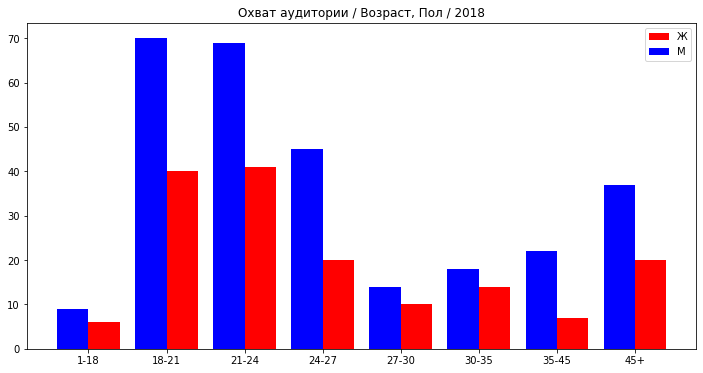

In [107]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def draw_gender_age(year):
  ## женское распределение по возрастам
  ## [0] - значение для категории Ж (а не М), [1] - возрастные показатели (а не Ж)
  x1 = list()
  y1 = list()
  for i in range(len(gender_age[year][0][1])):
    x1.append(gender_age[year][0][1][i][0])
    y1.append(gender_age[year][0][1][i][1])

  x2 = list()
  y2 = list()
  for i in range(len(gender_age[year][1][1])):
    x2.append(gender_age[year][1][1][i][0])
    y2.append(gender_age[year][1][1][i][1])

  ind = np.array(len(x1))
  fig, ax = plt.subplots()
  
  ## массив, который содержит номера отрезков - тиков
  xs = range(len(x1))
##  первый элемент plt.bar проставляет индексы иксов
## (на каких местах будут стоять значения - столбец)

  plt.title('Охват аудитории / Возраст, Пол / '+ year)
  plt.bar([x + 0.2 for x in xs], y1,
        width = 0.4, color = 'red', label=gender_age[year][0][0])
  plt.bar([x - 0.2 for x in xs], y2,
        width = 0.4, color = 'blue', label=gender_age[year][1][0])
  
  fig.set_figwidth(12)    #  ширина Figure
  fig.set_figheight(6)    #  высота Figure
  ## расположение подписей на оси икс
  plt.xticks(xs, x1)
  plt.legend()
  plt.show()

draw_gender_age('2018')


**Вывод:** как уже было замечено в предыдущих пунктах, наибольшую составляющую представляют представители мужского пола следующих возрастных категорий по убыванию: 18 – 21, 21 -24, 24 – 27 (для 2018 года), 30 – 35 (для 2019).



Проанализируем демографический показатель "countries".


*   Создаём словарь значений, если показатель встречается первый раз - записваем как новый.
*   Остортируем полученный словарь по годам\ страны - по алфавиту.



In [50]:
import csv

countries = dict()

with open('Lab_1_data.stat', 'r') as file:
    stat = csv.reader(file)
    for line in stat:
        if line[0] == "Дата":
          continue
        else:
          if line[1] == 'countries':
            if line[0].split('.')[2] in countries :
              age_2 = countries.get(line[0].split('.')[2])
              if line[2] in age_2:
                count = int(age_2.get(line[2]))
                count+= int(line[4])
                age_2[line[2]] = count
              else:
                age_2[line[2]] = int(line[4])
            else:
              countries[line[0].split('.')[2]] = {line[2]: line[4]}

#print(sorted(countries.items()))
for key in sorted(countries.keys()):
  countries[key] = sorted(countries[key].items())

print(countries)

#print(type(countries['2020'][0]))

{'2020': [('Азербайджан', 1), ('Беларусь', 6), ('Великобритания', 2), ('Венгрия', 1), ('Вьетнам', 1), ('Германия', 4), ('Индонезия', 1), ('Казахстан', 1), ('Канада', 1), ('Китай', 1), ('Малайзия', 1), ('Мексика', 1), ('Россия', 160), ('США', 15), ('Сингапур', 1), ('Таиланд', 1), ('Украина', 2), ('Финляндия', 1), ('Франция', 2), ('Южная Корея', 1)], '2019': [('', 7), ('Армения', 5), ('Беларусь', 10), ('Босния и Герцеговина', 1), ('Бразилия', 1), ('Великобритания', 2), ('Германия', 4), ('Индонезия', 1), ('Испания', 1), ('Казахстан', 7), ('Канада', 1), ('Китай', 1), ('Кыргызстан', 1), ('Малайзия', 1), ('Молдова', 2), ('Нидерланды', 3), ('Пакистан', 1), ('Польша', 2), ('Россия', 978), ('США', 7), ('Сингапур', 2), ('Таджикистан', 1), ('Таиланд', 5), ('Узбекистан', 1), ('Украина', 3), ('Франция', 4), ('Швейцария', 1), ('Швеция', 2), ('Южная Корея', 2)], '2018': [('', 3), ('Азербайджан', 2), ('Беларусь', 6), ('Великобритания', 2), ('Вьетнам', 1), ('Германия', 2), ('Дания', 1), ('Индонезия', 1



*   Выведем круговую диаграмму с информацией о странах.
*   Функция draw_countries позволит вывести график для каждого года, например ("2020"). 



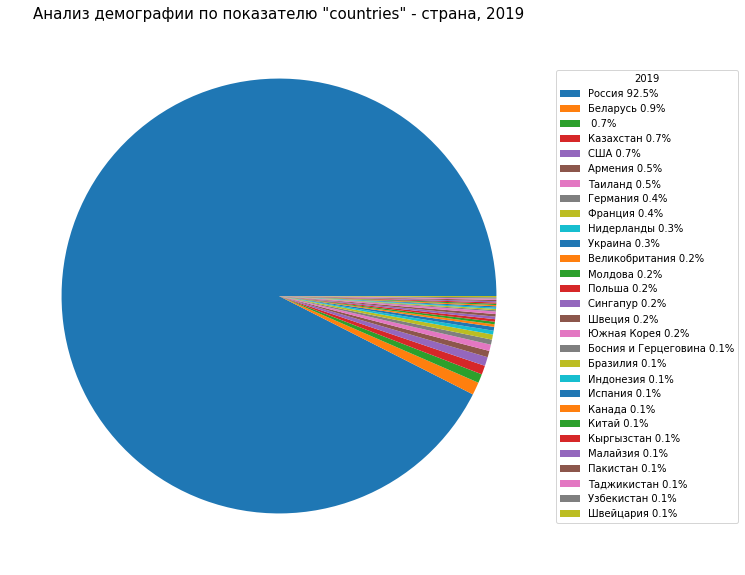

In [135]:
def draw_countries(year):
    # Эта программа выводит простую круговую диаграмму.
    import matplotlib.pyplot as plt
    %matplotlib inline

    # Создать список стран по году.
    place = list()
    for i in range(len(countries[year])):
      place.append(countries[year][i][1])

    all_places = sum(place)
    # Создать список меток долей.
    slice_labels = list()
    # Сортируем легенду
    countries[year].sort(key=lambda x: x[1], reverse=True)

    for i in range(len(countries[year])):
      percentage = " " + str(round(countries[year][i][1]/all_places*100, 1)) + '%'
      slice_labels.append(countries[year][i][0]+ percentage)

    fig, ax = plt.subplots()
 
    # Создать из этих значений круговую диаграмму.
    ax.pie(place)
    


    # Добавить заголовок.
    plt.title('Анализ демографии по показателю "countries" - страна, ' + year, fontsize=15)

    plt.legend(title = year,
          loc="center left",
          labels=slice_labels,
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    fig.set_figwidth(20)    #  ширина Figure
    fig.set_figheight(10)    #  высота Figure

    # Показать круговую диаграмму.
    plt.show()
draw_countries('2019')

**Вывод:** в группе превалируют пользователи из России: 78,4 % в 2020, 92,5 % в 2019. Второе место занимает группы пользователей из США 7,4 %, на третьем пользователи из республики Беларусь – 2,9 %.

##4. Проведём анализ обратной связи


*   Используем показатель feedback
*   Выведем содержимое показателя



*   Поскольку показатель содержит сравнительно малое количесвто данных, для дальнейшего анализа будем использовать критерии по всем годам, без разделения.






In [146]:
import csv


with open('Lab_1_data.stat', 'r') as file:
    stat = csv.reader(file)
    for line in stat:
      if line[0] == "Дата":
        continue
      else:
        if line[1] == "feedback":
          print(line)
         

['26.02.2020', 'feedback', 'Нравится', '', '1']
['16.02.2020', 'feedback', 'Нравится', '', '1']
['14.02.2020', 'feedback', 'Нравится', '', '2']
['08.02.2020', 'feedback', 'Нравится', '', '1']
['07.02.2020', 'feedback', 'Нравится', '', '3']
['06.02.2020', 'feedback', 'Нравится', '', '1']
['05.02.2020', 'feedback', 'Нравится', '', '4']
['29.12.2019', 'feedback', 'Нравится', '', '2']
['28.12.2019', 'feedback', 'Нравится', '', '1']
['27.12.2019', 'feedback', 'Нравится', '', '9']
['27.12.2019', 'feedback', 'Рассказали друзьям', '', '1']
['21.12.2019', 'feedback', 'Нравится', '', '1']
['20.12.2019', 'feedback', 'Нравится', '', '2']
['09.12.2019', 'feedback', 'Нравится', '', '1']
['08.12.2019', 'feedback', 'Нравится', '', '7']
['06.12.2019', 'feedback', 'Нравится', '', '1']
['05.12.2019', 'feedback', 'Нравится', '', '2']
['05.12.2019', 'feedback', 'Рассказали друзьям', '', '1']
['19.11.2019', 'feedback', 'Нравится', '', '2']
['14.11.2019', 'feedback', 'Нравится', '', '1']
['07.11.2019', 'feed



*   Создадаим словарь feedback = [критерий] - [значение].




In [144]:
import csv

feedback = dict()

with open('Lab_1_data.stat', 'r') as file:
    stat = csv.reader(file)
    feedback['Нравится'] = 0
    feedback['Комментарии'] = 0
    feedback['Рассказали друзьям'] = 0
    feedback['Упоминания'] = 0

    for line in stat:
      if line[0] == "Дата":
        continue
      else:
        if line[2] == "Нравится":
          feedback[str(line[2])] = feedback[str(line[2])] + int(line[4])
        elif line[2] == "Комментарии":
          feedback[str(line[2])] = feedback[str(line[2])] + int(line[4])
        elif line[2] == "Рассказали друзьям":
          feedback[str(line[2])] = feedback[str(line[2])] + int(line[4])
        elif line[2] == "Упоминания":
          feedback[str(line[2])] = feedback[str(line[2])] + int(line[4])
        
feedback


{'Комментарии': 5, 'Нравится': 88, 'Рассказали друзьям': 3, 'Упоминания': 1}



*  Построим круговую диаграмму, отображающую данные по обратной связи пользователей.
*  Выведем легенду, а также процентные показатели.




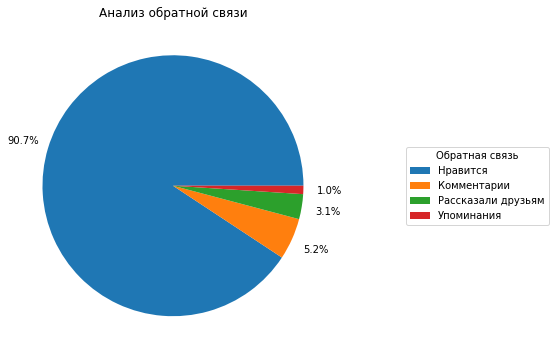

In [78]:
# Эта программа выводит простую круговую диаграмму.
import matplotlib.pyplot as plt
%matplotlib inline

# Создать список показателей.
response = list(feedback.values())
all_resps = sum(response)


# Создать список меток долей.
slice_labels = list(feedback.keys())

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

# Создать из этих значений круговую диаграмму.
plt.pie(response, autopct='%1.1f%%', pctdistance = 1.2)


# Добавить заголовок.
plt.title('Анализ обратной связи')

plt.legend(title = 'Обратная связь',
      loc="center left",
      labels=slice_labels,
       bbox_to_anchor=(1.2, 0, 0.5, 1))


# Показать круговую диаграмму.
plt.show()

**Вывод:** группа демонстрирует слабые показатели обратной связи пользователей.   Так, за 2020 год группу посетили 


*   print(sum(visitors.values())) = 204
*   print(sum(feedback.values())) = 13




Если в группе 204 человек и 13 из них активно реагируют на контент — значит, вовлечённых пользователей 15%.


# 5. Обосновать, подходит ли данная группа для продвижения нового товара среди активных пользователей из России моложе 30 лет?



Анализ данных показал, что данная группа подходит для продвижения нового товара среди активных пользователей из России моложе 30 лет.

*   Во – первых, исходя из анализа демографии пользователи из России являются превалирующей группой участников.

*   Во – вторых, группу посещают в основном представители молодого поколения, это возрастные группы: 18 – 21, 21 – 24 и 24 – 27.



Однако, следует также отметить, что аудиторию группы преимущественно составляют представители мужского пола – данный показатель в 1,5 – 2 раза превышает показатель женского пола. Основателям сообщества также стоит уделить внимание увеличению количества вовлечённых пользователей, показатель которых на 2019 год составил 15%. Достичь большего результата поможет регулярность публикаций, двусторонняя подача контента (вопросы, конкурсы, хештеги).